# Tracer une carte en Python

Le notebook propose plusieurs façons de tracer une cartes en Python.

Il y a principalement trois façons de tracer une carte. La première est statique avec des modules comme [basemap](https://matplotlib.org/basemap/) ou [cartopy](http://scitools.org.uk/cartopy/) qui sont des surcouches de [matplotlib](https://matplotlib.org/). Le second moyen est une carte animée ou non dans un notebook avec des modules comme [pygal](http://www.pygal.org/en/stable/documentation/types/maps/pygal_maps_world.html), [plotly](https://plot.ly/python/choropleth-maps/). La dernière consiste à insérer des éléments sur une carte en ligne telle que [OpenStreetMap](https://www.openstreetmap.org/) et le module [folium](https://github.com/python-visualization/folium) ou [ipyleaflet](https://github.com/ellisonbg/ipyleaflet).

Il y a souvent trois problèmes avec les cartes. Le premier sont avec les coordonnées. Les plus utilisées sont les coordonnées [longitude / latitude](https://fr.wikipedia.org/wiki/Coordonn%C3%A9es_g%C3%A9ographiques). Le problème est chaque pays a son propre système adapté à sa position géographique. Il faut souvent convertir (voir [lambert93_to_WGPS](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/ensae_teaching_cs/helpers/geo_helper.html?highlight=basemap#ensae_teaching_cs.helpers.geo_helper.lambert93_to_WGPS), [pyproj](https://jswhit.github.io/pyproj/)). Le second problème est l'ajout de repères géographiques (frontières, fleuves, ...). Certains modules contiennent certaines informations, souvent pour les Etats-Unis. Mais souvent, il faut récupérer ces informations sur les sites open data de chaque pays : [départements français](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx3/notebooks/td1a_cenonce_session_12.html?highlight=basemap#cartes-avec-les-departements). La troisième difficulté est qu'on veut tracer des cartes très chargées et cela prend un temps fou.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## données

In [3]:
from papierstat.datasets import load_enedis_dataset
df = load_enedis_dataset()
df.head(n=2).T

,0,1
Année,2016,2016
Nom commune,Ponteilla,Varreddes
Code commune,66145,77483
Nom EPCI,CU Perpignan Méditerranée (Pmcu),CA Pays de Meaux
Code EPCI,200027183,247700628
Type EPCI,CU,CA
Nom département,Pyrénées-Orientales,Seine-et-Marne
Code département,66,77
Nom région,Occitanie,Île-de-France
Code région,76,11


## basemap

In [4]:
from mpl_toolkits.basemap import __version__
__version__

'1.1.0'

c:\python364_x64\lib\site-packages\mpl_toolkits\basemap\__init__.py:1704: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
c:\python364_x64\lib\site-packages\mpl_toolkits\basemap\__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


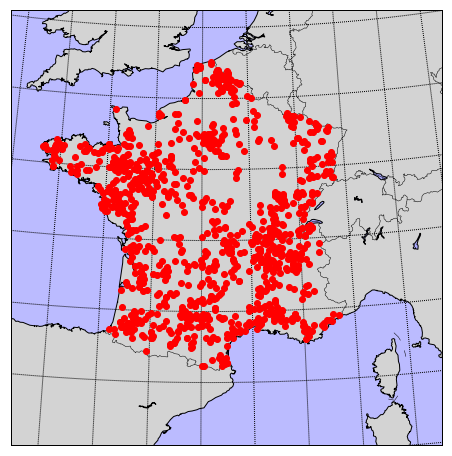

In [5]:
from mpl_toolkits.basemap import Basemap
import numpy

import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(8,8))

m = Basemap(llcrnrlon=-5, llcrnrlat=40, urcrnrlon=13, urcrnrlat=52,
            resolution='i', projection='cass', lon_0=2.34, lat_0=48,
            ax=axes)
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgrey', lake_color='#AAAAFF')

m.drawparallels(numpy.arange(-40,61.,2.))
m.drawmeridians(numpy.arange(-20.,21.,2.))
m.drawmapboundary(fill_color='#BBBBFF')

for ind, lat, lon in df[['lat', 'long']][:1000].itertuples():
    x,y = m(lon, lat)  # la conversion opère ici
    m.plot(x, y, 'ro', markersize=6)
    # ax.text(x, y, "Paris")

## plotly

Il faut s'authentifier.

## geopandas

[geopandas](http://geopandas.org/) est l'outil qui devient populaire. La partie cartes est accessible via l'[API de geopandas](http://geopandas.org/mapping.html). Il n'inclut moins de données que *basemap*.

In [6]:
import geopandas as gpd
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,Palikir,POINT (158.1499743237623 6.916643696007725)


In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


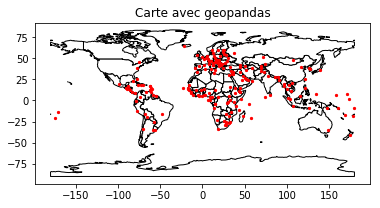

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_aspect('equal')
world.plot(ax=ax, color='white', edgecolor='black')
cities.plot(ax=ax, marker='o', color='red', markersize=5)
ax.set_title('Carte avec geopandas');

On restreint à l'Europe et pas trop loin de la France métropole.

In [9]:
from shapely.geometry import Polygon
europe = world[world.continent == "Europe"].copy()
europe['geometry'] = europe.geometry.intersection(Polygon([(-10,35), (50,35), (50,70), (-10, 70)]))
europe.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,..."
12,10414336.0,Europe,Belgium,BEL,389300.0,"POLYGON ((3.314971144228537 51.34578095153609,..."
16,7204687.0,Europe,Bulgaria,BGR,93750.0,"POLYGON ((22.65714969248299 44.23492300066128,..."
18,4613414.0,Europe,Bosnia and Herz.,BIH,29700.0,"POLYGON ((19.00548628101012 44.86023366960916,..."


In [10]:
from shapely.geometry import Point
points = [Point(lon, lat) for ind, lat, lon in df[['lat', 'long']][:1000].itertuples()]
enedis = gpd.GeoDataFrame(data=dict(geometry=points))
enedis.head()

,geometry
0,POINT (2.82631103755 42.6323626522)
1,POINT (2.92725176893 49.0059497861)
2,POINT (4.21389044246 44.4604648196)
3,POINT (0.974214866115 47.1204664673)
4,POINT (5.08531612205 48.6170558356)


Text(0.5,1,"Carte de l'Europe avec geopandas")

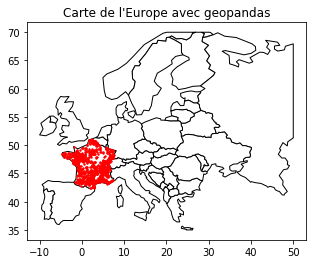

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
europe.plot(ax=ax, color='white', edgecolor='black')
enedis.plot(ax=ax, marker='o', color='red', markersize=2)
ax.set_title("Carte de l'Europe avec geopandas")

## folium

In [12]:
import folium
map_osm = folium.Map(location=[48.85, 2.34])

for ind, lat, lon, com in df[['lat', 'long', 'Nom commune']][:50].itertuples():
    map_osm.add_child(folium.RegularPolygonMarker(location=[lat,lon], popup=com,
                       fill_color='#132b5e', radius=5))

map_osm